
## **PRÁCTICA 5 - QUANTUM MACHINE LEARNING**

_______________________________________
---------------------------------------
--------------------------------------


* Jose Andres Henao Alzate CC 1036686332

* Santiago Giraldo Tabares CC 1000763987

* Jakob Kuhn

#1. Primer Circuito Cuántico en Pennylane


In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dev= qml.device("default.qubit",wires=2)

In [ ]:
@qml.qnode(dev)
def circuit(theta):
  qml.PauliX(wires=1)
  qml.CNOT(wires=[1,0])
  qml.RY(theta,wires=0)
  return qml.expval(qml.PauliZ(wires=0))

In [ ]:
print(circuit(np.pi))

1.0


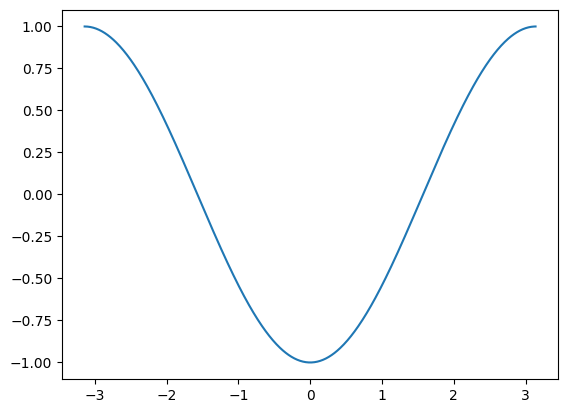

In [ ]:
thetas= np.arange(-np.pi,np.pi,0.01)
measurements= np.zeros(len(thetas))
for i,theta in enumerate(thetas):
  measurements[i]=circuit(theta)
plt.plot(thetas,measurements)

$Demostración$ $y$ $explicación$ $matemática$$.$

Circuito implementado:

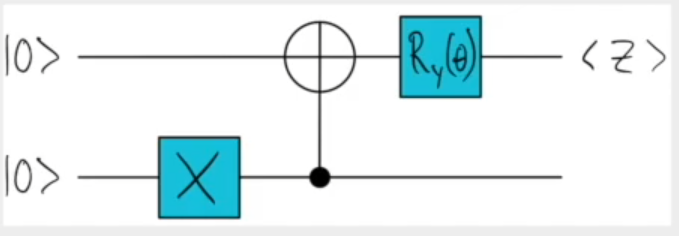

Como inicialmente ambos qubits son igual a |0>, se procede con las implementaciones matemáticas de cada uno:
  * El ket de abajo, al aplicársele la compuerta X queda igual a |1>. Mientras que el ket de arriba queda intacto.
  * En la segunda etapa, el ket de arriba pasa a ser |1>, debido a que que sufre una inversión por que el control esta en |1> (ket de abajo).
  * Al aplicarse una rotación con theta=pi, se obtiene lo siguiente:
   



$$
R_y(\pi) =
\begin{bmatrix}
\cos\left(\frac{\pi}{2}\right) & -\sin\left(\frac{\pi}{2}\right) \\
\sin\left(\frac{\pi}{2}\right) & \cos\left(\frac{\pi}{2}\right)
\end{bmatrix}
=
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$

$$
|1\rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

$$
R_y(\pi) |1\rangle =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
0
\end{bmatrix}
= -|0\rangle
$$


Finalmente, al anterior resultado se le encuentra el valor esperado con un observable Z. El procedimiento y posterior resultado se presenta a continuacion.

Sea el estado:

$$
|\psi\rangle = -|0\rangle = - \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

Y el observable Pauli-Z:

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

El valor esperado se calcula como:

$$
\langle Z \rangle = \langle \psi | Z | \psi \rangle
$$

El bra es igual a:

$$
\langle \psi | = (|\psi\rangle)^\dagger = \left(- \begin{bmatrix} 1 \\ 0 \end{bmatrix} \right)^\dagger = - \begin{bmatrix} 1 & 0 \end{bmatrix}
$$

Ahora, la multiplicación matricial es igual a:

$$
\langle Z \rangle =
(- \begin{bmatrix} 1 & 0 \end{bmatrix})
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
(- \begin{bmatrix} 1 \\ 0 \end{bmatrix})
$$

$$
= (-1)(-1)
\begin{bmatrix} 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
= 1 \cdot (1) = 1
$$

Por tanto, el valor esperado es:

$$
\boxed{ \langle Z \rangle = 1 }
$$


Por lo tanto, se concluye que la medición reiterada del sistema con un observable cuántico de pauli es igual a 1. Este a su vez es el máximo valor, puesto que, la matriz RY, esta compuesta por funciones senos y cosenos, y por ende, este será el máximo valor posible.

$Implementación$ $del$ $segundo$ $circuito$ $del$ $tutorial.$

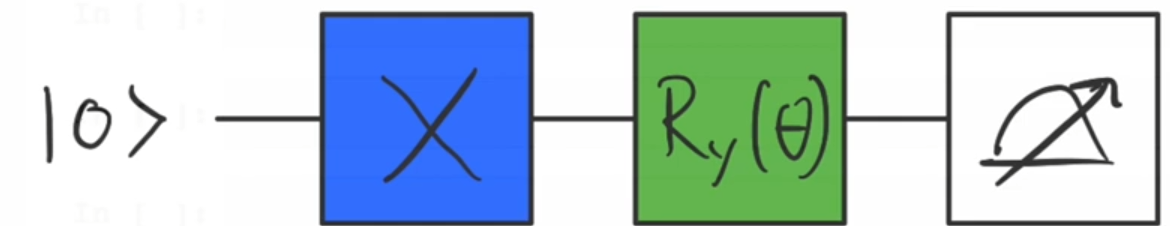

In [ ]:
dev= qml.device('lightning.qubit',wires=1)

In [ ]:
@qml.qnode(dev)
def circuit(theta):
  qml.PauliX(wires=0)
  qml.RY(theta,wires=0)
  return qml.expval(qml.PauliZ(0))


* Función de optimización.

In [ ]:
theta=np.array([-2.0],requires_grad=True)

In [ ]:
opt= qml.GradientDescentOptimizer(stepsize=0.1)
n_int=100
for i in range(n_int):
  theta,prev_cost= opt.step_and_cost(circuit,theta)
  if i%10==0:
    print("Theta: ",theta," Cost: ",circuit(theta))

Theta:  [-1.90907026]  Cost:  [0.33185934]
Theta:  [-0.95268251]  Cost:  [-0.579499]
Theta:  [-0.35999832]  Cost:  [-0.93589741]
Theta:  [-0.12693105]  Cost:  [-0.99195506]
Theta:  [-0.04431925]  Cost:  [-0.99901806]
Theta:  [-0.01545577]  Cost:  [-0.99988056]
Theta:  [-0.0053892]  Cost:  [-0.99998548]
Theta:  [-0.0018791]  Cost:  [-0.99999823]
Theta:  [-0.0006552]  Cost:  [-0.99999979]
Theta:  [-0.00022846]  Cost:  [-0.99999997]


# Introducción a los circuitos Variacionales

2.1 Conceptos y definiciones

### **GLOSARIO** ###

1. **Clasificadores cuánticos variacionales**:  

  También llamados VQC. Son circuitos cuánticos que pueden ser entrenados a partir de datos etiquetados con el fin de clasificar nuevas muestras de datos [(Schuld, 2024)](https://pennylane.ai/qml/demos/tutorial_variational_classifier) . Estos circuitos sintetizan un algoritmo híbrido de aprendizaje que permite resolver una amplia variedad de problemas de clasificación. En este algoritmo, primero se codifican los datos en un estado cuántico mediante lo que se conoce como un circuito de feature map o mapa de características. La salida de anterior circuito se pasa a un circuito cuántico variacional, que es un circuito cuántico parametrizable. Luego, la salida resultante se emplea para optimizar clásicamente (métodos clásicos de optimización), para minimizar la función de pérdida. Los parámetros del VQC se actualizan iteración a iteración hasta que la función de pérdida llega a su estado de mínima de energía. Con ello, se considera entrenado el circuito y puede emplearse para la clasificación de nuevos datos de entrada [(Mittal, 2023)](https://medium.com/@typekrish/what-is-a-variational-quantum-classifier-888e40f83b24).

  &nbsp;
---
2. **Basis Encoding (codificación de base)**:  
  Es un método de codificación que permite asociar cada elemento de un dataset a un estado de la base computacional cuántica. O, dicho de otro modo, permite asociar cada entrada (por ejemplo, cada *bitstring*) en un respectivo y único estado cuántico dentro de la base que constituyan nuestros qubits. Por ejemplo, sea $D$ el *Dataset* empleado. Donde cada elemento de este *Dataset* se denomina como  $x_m$. Y cada $x_m$ tiene sus respectivas características (*features*) codificadas en binario como  $(b_1,b_2,...,b_N)$ tal que

    $$
      x_m = (b_1, b_2, …, b_N)
    $$

  Entonces, si $|x_m⟩$ puede definirse cuánticamente como $|x_m⟩ = |b_1    b_2    ...   b_N⟩$, entonces el estado cuántico que codifica al Dataset de interés viene dado por:

  $$
  |D⟩ =  \frac{1}{\sqrt{M}} \sum_{m=1}^{M} |x_m⟩
  $$
  
  Con $M$ como el número de elementos en $D$. Por ejemplo, si el dataset $D$ tiene los siguiente 6 elementos:

  $$
  D={5,0,2,10,3,1}
  $$

  Y cada elemento se codifica en binario como: $D=[0101,0000,0010,1010,0011,0001] $, el estado cuántico que codifica el Dataset queda:

  $$
  |D⟩ =  \frac{1}{\sqrt{6}} (|0101⟩+|0000⟩+|0010⟩+|1010⟩+|0011⟩+|0001⟩)
  $$

  Y su vector en la base computacional corresponde a:
  $$
  \vec{x} = \frac{1}{2}(1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0)
  $$
  
  Basis Encoding entonces permite codificar entradas binarias en el estado inicial del circuito variacional.   [10](https://talentq-es.github.io/QML/docs/Part_02_QML/Chapter_02_Feature_encoding_myst.html).

&nbsp;
---
3. **Optimización de circuitos variacionales para emular funciones de paridad**:
  Un circuito variacional puede emplearse para emular la función de paridad, que no es más que:

  $$
  f:x ∈  \{0,1\}^{⊗n} \to \{0,1\}, \quad
  f(x) =
  \begin{cases}
  1 & \text{si el número de 1s en } x \text{ es impar} \\
  0 & \text{en otro caso}
  \end{cases}
  $$
  
  &nbsp;

  Cuando se habla de emular la función de paridad mediante el circuito variacional, hablamos de que el objetivo de entrenar el modelo es ese, ajustar los parámetros del circuito para aproximar la función de paridad correspondiente al set de datos. El resultado debe ser un circuito que se asemeje lo máximo posible a la función de paridad real de los datos. Si bien la función de paridad es algo limitada como método de detección de errores, puede ser computacionalmente compleja de implementar. Por lo tanto, es útil su emulación mediante la cuántica pues se reduce el cómputo necesario gracias al paralelismo. Se podría decir que su implementación en el tutorial tiene fines pedagógicos.
  &nbsp;

---
4. **Anillo de CNOTs para entrelazar qubits con sus vecinos**:
  Hace referencia a la topología en la cuál disponemos varias compuertas CNOT a lo largo del circuito cuántico con el fin de entrelazar todos los qubits disponibles. Cómo el nombre "anillo" lo indica, se trata de conectar compuertas **CNOT**s entre qubits vecinos (por ejemplo, $q_0$ con $q_1$, $q_1$ con $q_2$, $q_2$ con $q_3$ y así sucesivamente). Para cerrar el "anillo", el último qubit se entrelaza con el primero también mediante una **CNOT** (por ejemplo, si se tiene un sistema de 4 qubits donde están $q_0$, $q_1$, $q_2$ y $q_3$, una **CNOT** entre $q_3$ y $q_0$ cerrará el anillo). El propósito de esta topología es asegurar el un entrelazamiento homogeneo del sistema, con lo que la información se distribuye por todo el sistema cuántico.

  Para el caso particular del tutorial de *Pennylane*, el circuito presenta 4 qubits, y posterior a la rotación en $Y$ sobre cada qubit, ubica el anillo de **CNOT**s. tal y como se evidencia en:

  ```
  def layer(layer_weights):
      for wire in range(4):
          qml.Rot(*layer_weights[wire], wires=wire)

      for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
          qml.CNOT(wires)
  ```

  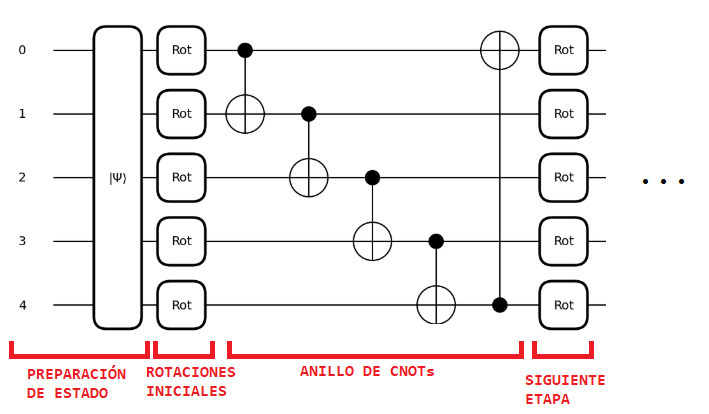

---
5. **Weights (Pesos)**:
  Este término, que se toma prestado del Machine Learning Clásico, hace referencia a valores numéricos que indican cuánto influye cada característica en el modelo de aprendizaje. Dicho de otro modo, los pesos no son más que valores que múltiplican a las entradas para asignarles un cierto grado de influencia en la salida total. Un peso elevado en una conexión específica entre neuronas, implica que la entrada que pasa por esa conexión tiene un fuerte impacto sobre lo que se obtendrá en la salida.

  $$
  y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
  $$

  En el contexto específico de los circuitos cuánticos variacionales, los pesos no son que parámetros del VQC (recuerde que estos circuitos son parametrizables), y se ajustan durante el entrenamiento del modelo (tal y como ocurre en Machine Learning Clásico). Este ajuste en los pesos se ve reflejado en ajustes a los ángulos de rotación de las compuertas $R_y$ $(θ, Φ, λ)$. Y, en consecuencia, alteran el comportamiento del circuito cuántico sobre las entradas.

  En el caso especifico de los clasificadores variacionales cuánticos expuestos por Pennylane, los pesos se inicializan de manera aleatoria:

  ```
  weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
  ```

  Estos pesos, inicialmente aleatorios, se van actualizando con cada iteración de entrenamiento, mediante el Optimizer (algoritmo clásico de optimización, típicamente gradient descent o Nesterov Momentum) para minimizar una función de pérdida. Esto, usando un lote de datos limitado por iteraación. [5](https://www.geeksforgeeks.org/deep-learning/the-role-of-weights-and-bias-in-neural-networks/)
  
  
---
6. **BasisState function**:
  Función provista por Pennylane que permite hacer precisamente lo que se estableció en el inciso 2 (basis encoding), pues recibe un bitstring clásico (binario) y lo códifica en estados de qubits, lo que permite preparar el estado cuántico base. En particular, esta función prepara un estado tal que pone en 1, aquellos qubits correspondientes a entradas en 1. Por ejemplo, suponga una entrada **x = 0101**, que es un bitstring clásico que podría ser argumento de la función basisState. Se espera que, en un sistema cuántico con 4 qubits o wires, el estado preparado sea **$   |ψ> = |0101>$**. El argumento *x* (entrada) debe ser del tipo ``list``.


---
7. **Supervised Learning (Aprendizaje supervisado)**:
  Es un tipo de algoritmo de machine learning que emplea datos plenamente conocidos (que constituyen lo que se denomina Datos de Entrenamiento). Busca entrenar un modelo con un conjunto de datos de entrada, que están asociados cada uno a su respectiva salida esperada. Por lo tanto, el modelo, tras ser entrenado, solo debe enfocarse en el reconocimiento del patrón asociado a la relación entre los datos de entrada y las posibles salidas. Es por eso que se emplea comúnmente en clasificadores, como el VQC [7](https://es.mathworks.com/discovery/supervised-learning.html).
  
  Cada feature, en el set de entrenamiento, debe ir asociada o adjunta a una respectiva salida esperada. Es el paradigma de aprendizaje que se emplea en los clasificadores variacionales expuestos por el tutorial de Pennylane. [6](https://www.ionos.es/digitalguide/online-marketing/marketing-para-motores-de-busqueda/supervised-learning/)

---
8. **Cost Function (Función de costo)**:
  "En el aprendizaje supervisado, la función de costo suele ser la suma de una pérdida y un regularizador. En este caso, nos limitamos a la función Standar Square Loss, que mide la distancia entre las etiquetas de destina (valores esperados) y las predicciones del modelo (valores predecidos)". La función de costo puede entenderse como una fórmula matemática que mide la diferencia o desviaciónn entre los valores de salida objetivos o esperados, y los valores de salida obtenidos por el modelo entrenado. Sirve como una métrica de cuán bien o mal predice el modelo, y es fundamental para los procesos de optmización, pues direcciona el mejoramiento en rendimiento del modelo. Minimizar la función de costos implica ajustar los parametros (pesos y sesgos, que en otros términos son los parámetros de nuestro circuito como los ángulos de rotación), durante el entrenamiento. Técnicas como el gradiente descendente

  $$
  J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(y_i, \hat{y}_i)
  $$

  Donde:

  $$
  J(\theta): \text{ función de costo promedio que evalúa el rendimiento del modelo parametrizado por } \theta.
  $$

  $$
  m: \text{ número total de ejemplos de entrenamiento}.
  $$

  $$
  y_i: \text{ valor real (etiqueta verdadera) para el ejemplo } i.
  $$

  $$
  \hat{y}_i: \text{ valor predicho por el modelo para el ejemplo } i.
  $$

  $$
  \mathcal{L}(y_i, \hat{y}_i): \text{ función de pérdida que mide el error entre la predicción y el valor real}.
  $$

  Formas comunes de $\mathcal{L}$:

  **Error cuadrático medio (MSE):**

  $$
  \mathcal{L}(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2
  $$

  **Error absoluto medio (MAE):**

  $$
  \mathcal{L}(y_i, \hat{y}_i) = \left| y_i - \hat{y}_i \right|
  $$

  **Entropía cruzada (binary cross-entropy):**

  $$
  \mathcal{L}(y_i, \hat{y}_i) = -\left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
  $$
  
  Nótese que es conceptualmente similar a la función de pérdidas, pero tienen propósitos diferentes, ya que mientras la función de costo mide el error promedio para la totalidad del dataset (útil  para optimizar el modelo mediante la minimización de un único valor de error unificado), la función de pérdidas lo hace para un dato puntual (útil para cálculo de gradientes de datos puntuales) [8](https://medium.com/@harshsranjane03/understanding-cost-functions-in-machine-learning-a-complete-guide-3f58b07f0ec5).

---
9. **Inicialización aleatoria de variables**:
  Tal y como se sugirió en el inciso 5 (Weights - Pesos), la inicialización aleatoria de variables es el proceso mediante el cuál se le asigna un valor inicial a los parámetros del circuito variacional de nuestor modelo. En este caso, el punto de partida para nuestros parámetros, lo cuales son pesos y biases, se determina de forma aleatoria mediante funciones como `np.random.randn` o `np.random.randint`para los valores y `np.random.seed` para la semilla de aleatoriedad (esto indica realmente una pseudo-aleatoriedad, que de hecho es reproducible).

  La inicialización aleatoria de los pesos no es exclusiva en los VQC, sino que es un menester propio también en el Machine Learning Clásico. El motivo detrás de la inicialización aleatoria de pesos se debe a que esa aleatoriedad es una expectativa del algoritmo de optimización estocástica (i.e. *Gradient Descent*) que se utiliza para el entrenamiento. Es decir, es el escenerio de trabajo esperado por los algoritmos no deterministicos.

  Como nota adicional, la razón detrás del uso de algoritmos de optimización no deterministicos o estocásticos, permite sortear el problema que puede darse por los sesgos introducidos en inicializaciones determinadas. Por ejemplo, una mala inicializacion de las variables puede  llevar al modelo a estancarse en, por ejemplo, un óptimo local, o lo que sería un falso estado de mínima energía. Por lo que la inicialización aleatoria de las variables permite explorar a cabalidad el espacio de búsqueda, para que no existan sesgos que estanquen el aprendizaje del modelo [9](https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/).

---
10. **Batch Size**:
  O tamaño de lote, hace referencia al tamaño en cantidad de muestras que componen un conjunto destinado a ser procesado (por iteración) por el algoritmo de optimización. Es decir, en lugar de actualizar los parametros del modelo a partir de la totalidad de los datos del data-set, se hace a partir de un lote pequeño de n-muestras. A esta metodología se le conoce como entrenamiento estocástico y no es un concepto exclusivo de los VQC, sino del Machine Learning en general, e incluso puede encontrarse en otros ámbitos de la informática, aunque asignado a significados y contextos diferentes.
  
  Para efectos del tutorial de Pennylane, se seleccionó un Batch Size de 5. Esto implica que solo 5 muestras seleccionadas aleatoriamente del data-set serán utilizadas (por iteración), para el entrenamiento del modelo por medio del optimizador.

2.2 Implementación del primer ejemplo de circuitos variacionales.

## Implementación del circuito con modificaciones y explicación de los bloques principales del código.

Como modificación al circuito implementado en el tutororial, se decidió no solo hacer un aumento en la cantidad de qubits del circuito, sino también, cambiar el dataset de entrenamiento y prueba. El nuevo dataset sigue la siguiente lógica:
  * la salida es 1, si y solo sí, en los primeros cuatro bits de izquierda a derecha hay 2 1s consecutivos, en caso contrario, la salida es 0.


De esta manera se explora mas a fondo la funcionalidad y lógica llevada a cabo en la implementación de un sistema de machine learning cuántico.

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

In [ ]:
dev = qml.device("default.qubit",wires=5)

El primer bloque de código, define las capas del circuito variacional, el segundo, define la arquitectura del circuito como tal, es decir, se definen las compuertas que causarán las rotaciones sobre cada uno de los qubits y las CNOT, que los entrelazan con los vecinos.

In [ ]:
def layer(layer_weights):
    for wire in range(5):
        qml.Rot(*layer_weights[wire], wires=wire)

    for wires in ([0, 1], [1, 2], [2, 3],[3,4], [4, 0]):
        qml.CNOT(wires)
def state_preparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3,4])

In [ ]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)

    return qml.expval(qml.PauliZ(0))

Circuito variacional implmentado, y modificado a 5 qubits y 4 etapas.

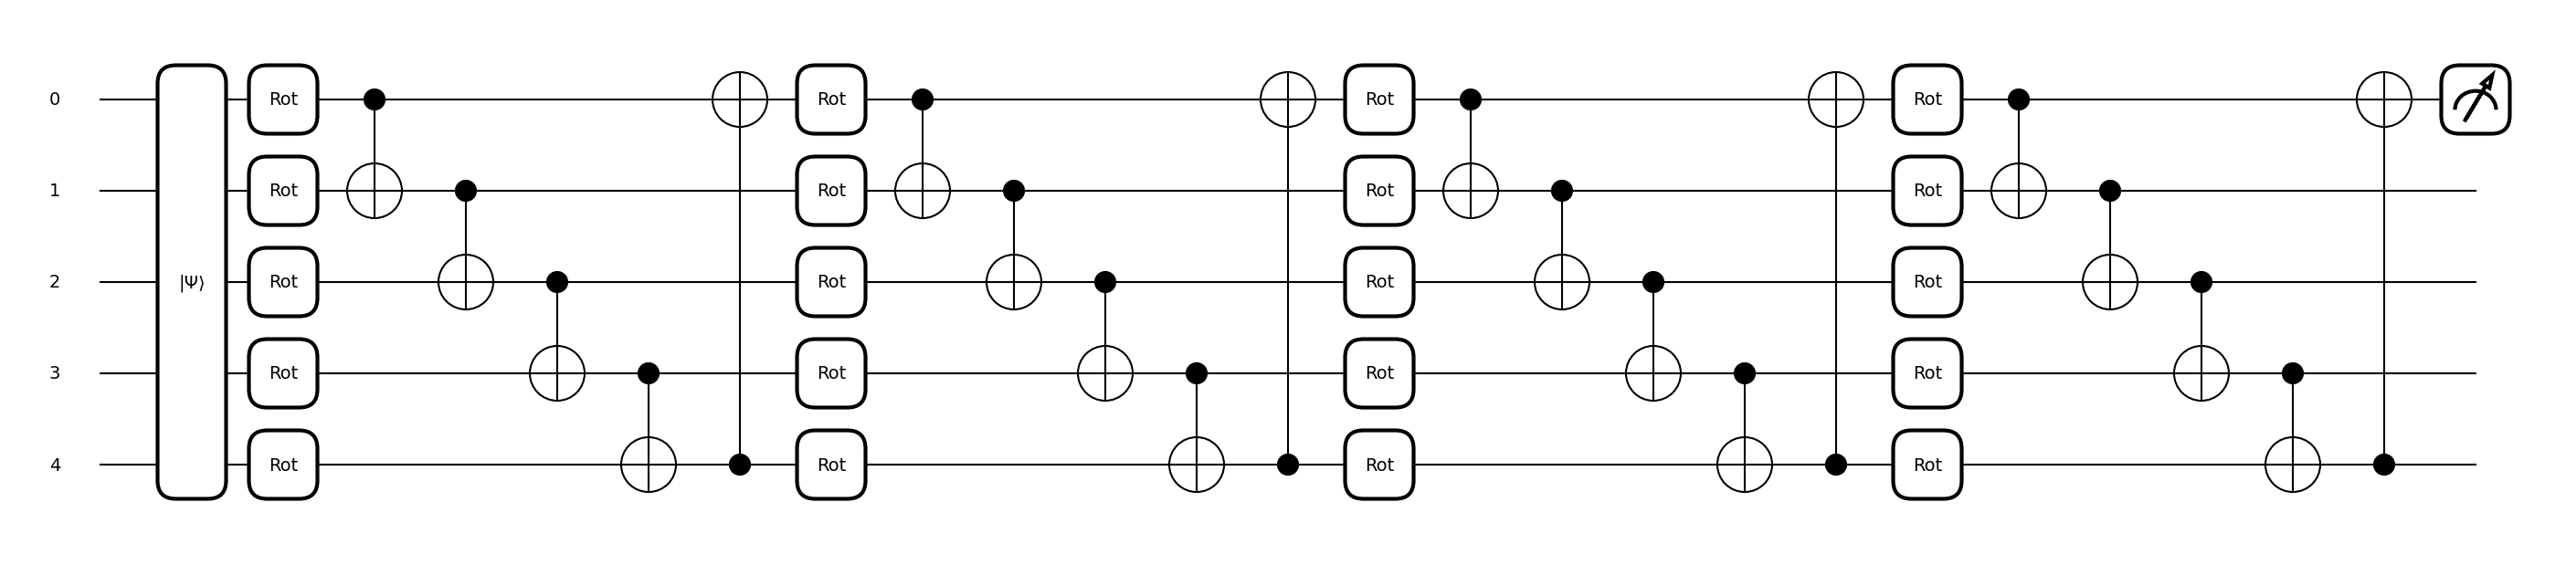

In [ ]:
import matplotlib.pyplot as plt

qml.drawer.use_style("black_white")
weights = np.array([
    [[0.1, 0.2, 0.3],
     [0.4, 0.5, 0.6],
     [0.7, 0.8, 0.9],
     [1.0, 1.1, 1.2],
     [1.3, 1.4, 1.5]],

    [[1.6, 1.7, 1.8],
     [1.9, 2.0, 2.1],
     [2.2, 2.3, 2.4],
     [2.5, 2.6, 2.7],
     [2.8, 2.9, 3.0]],

     [[1.6, 1.7, 1.8],
     [1.9, 2.0, 2.1],
     [2.2, 2.3, 2.4],
     [2.5, 2.6, 2.7],
     [2.8, 2.9, 3.0]],

     [[1.6, 1.7, 1.8],
     [1.9, 2.0, 2.1],
     [2.2, 2.3, 2.4],
     [2.5, 2.6, 2.7],
     [2.8, 2.9, 3.0]]
])


x = np.array([0, 1, 0, 1,1])
fig, ax = qml.draw_mpl(circuit)(weights, x)
plt.show()


El primer bloque, define la función encargada de sumar la salida del circuito con un bias o sesgo. Por otro lado, el segundo bloque define las funciones de perdida, el cual para el presente caso es el error cuadrático medio, además, se define la función de accuracy para medir la presición del sistema y la función de costos para la posterior actualización de los pesos.

In [ ]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

In [ ]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

Se genera un dataset personalizado, el cual, da una salida de 1 cuándo en los 4 primero qubits aparecen dos 1s consecutivos, en caso contrario, la salida es cero.

In [ ]:
def generar_dataset_5bits(n_muestras):
    datos = []

    while len(datos) < n_muestras:
        bits = np.random.randint(0, 2, size=5)  # 5 bits
        suma = np.sum(bits[:4])  # Solo los primeros 4 importan para la regla

        # Verificar si hay dos 1s consecutivos en los primeros 4 bits
        consecutivos = any(bits[i] == 1 and bits[i+1] == 1 for i in range(3))

        # Regla para etiqueta
        etiqueta = 1 if consecutivos and suma >= 2 else 0

        datos.append(np.append(bits, etiqueta))  # Guardar entrada (5 bits) + etiqueta

    datos = np.array(datos)
    np.random.shuffle(datos)
    return datos


Se toman 20 datos para entrenamiento y 8 para prueba.

In [ ]:
personal_data_train= generar_dataset_5bits(20)
personal_data_test= generar_dataset_5bits(8)
print("Datos de entrenamiento: ",personal_data_train)
print("Datos de prueba o test: ",personal_data_test)

Datos de entrenamiento:  [[0 1 1 1 1 1]
 [1 1 0 0 0 1]
 [0 1 0 1 0 0]
 [1 0 1 1 1 1]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 0 1 1 0]
 [1 1 0 0 0 1]
 [1 1 1 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 1 1 1 1 1]
 [1 0 0 1 1 0]
 [0 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 0 0 1 0 0]
 [0 0 1 1 1 1]
 [1 0 1 0 0 0]]
Datos de prueba o test:  [[0 1 1 1 0 1]
 [0 0 0 1 0 0]
 [1 1 1 1 0 1]
 [1 1 0 1 0 1]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]]


In [ ]:


# Separar entradas (X) y etiquetas (Y)
X = personal_data_train[:, :5]
Y = personal_data_train[:, 5]
Y=Y*2-1

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

x = [0 1 1 1 1], y = 1
x = [1 1 0 0 0], y = 1
x = [0 1 0 1 0], y = -1
x = [1 0 1 1 1], y = 1
x = [0 0 1 0 0], y = -1
x = [1 0 0 0 1], y = -1
x = [0 0 0 0 0], y = -1
x = [1 0 0 1 1], y = -1
x = [1 1 0 0 0], y = 1
x = [1 1 1 0 0], y = 1
x = [0 1 0 0 0], y = -1
x = [1 0 0 0 0], y = -1
x = [0 1 0 0 0], y = -1
x = [1 1 1 1 1], y = 1
x = [1 0 0 1 1], y = -1
x = [0 1 1 1 1], y = 1
x = [1 1 1 1 1], y = 1
x = [1 0 0 1 0], y = -1
x = [0 0 1 1 1], y = 1
x = [1 0 1 0 0], y = -1


En este segmento, se asignan la cantidad de qubits y de capas del circuito a entrenar. Además, se inicializan los pesos y sesgos.

In [ ]:
np.random.seed(0)
num_qubits = 5
num_layers = 4
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

print("Weights:", weights_init)
print("Bias: ", bias_init)

Weights: [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]
  [ 0.00761038  0.00121675  0.00443863]]

 [[ 0.00333674  0.01494079 -0.00205158]
  [ 0.00313068 -0.00854096 -0.0255299 ]
  [ 0.00653619  0.00864436 -0.00742165]
  [ 0.02269755 -0.01454366  0.00045759]
  [-0.00187184  0.01532779  0.01469359]]

 [[ 0.00154947  0.00378163 -0.00887786]
  [-0.01980796 -0.00347912  0.00156349]
  [ 0.01230291  0.0120238  -0.00387327]
  [-0.00302303 -0.01048553 -0.01420018]
  [-0.0170627   0.01950775 -0.00509652]]

 [[-0.00438074 -0.01252795  0.0077749 ]
  [-0.01613898 -0.0021274  -0.00895467]
  [ 0.00386902 -0.00510805 -0.01180632]
  [-0.00028182  0.00428332  0.00066517]
  [ 0.00302472 -0.00634322 -0.00362741]]]
Bias:  0.0


En el código de abajo, se le hace un llamado a la función de optimización que se usará. También, se define el batch_size

In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 6

Teniendo todo listo, se procede con el entrenamiento. El ciclo del código de abajo entrena el circuito variacional previamente establecido, y con el dataset personalizado

In [ ]:
weights = weights_init
bias = bias_init
for it in range(100):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

Iter:    1 | Cost: 3.0334365 | Accuracy: 0.3000000
Iter:    2 | Cost: 2.9431501 | Accuracy: 0.3000000
Iter:    3 | Cost: 3.6110755 | Accuracy: 0.5500000
Iter:    4 | Cost: 1.0133664 | Accuracy: 0.5500000
Iter:    5 | Cost: 1.1898116 | Accuracy: 0.5500000
Iter:    6 | Cost: 1.3908694 | Accuracy: 0.4000000
Iter:    7 | Cost: 0.9523938 | Accuracy: 0.6500000
Iter:    8 | Cost: 0.6006657 | Accuracy: 0.8500000
Iter:    9 | Cost: 1.1855529 | Accuracy: 0.5500000
Iter:   10 | Cost: 0.8524291 | Accuracy: 0.6000000
Iter:   11 | Cost: 1.0456227 | Accuracy: 0.7000000
Iter:   12 | Cost: 0.7696707 | Accuracy: 0.6500000
Iter:   13 | Cost: 0.9457917 | Accuracy: 0.6000000
Iter:   14 | Cost: 0.9077998 | Accuracy: 0.7000000
Iter:   15 | Cost: 0.9908789 | Accuracy: 0.6500000
Iter:   16 | Cost: 0.7410936 | Accuracy: 0.7000000
Iter:   17 | Cost: 0.9976631 | Accuracy: 0.5000000
Iter:   18 | Cost: 1.2871455 | Accuracy: 0.4500000
Iter:   19 | Cost: 1.0123565 | Accuracy: 0.5500000
Iter:   20 | Cost: 0.7731136 | 

## Pesos entrenados


In [ ]:
print(f"los pesos entrenados son:{weights}, mientras que los bias son: {bias}")

los pesos entrenados son:[[[ 1.76405235e-02 -5.80432249e+00  3.80425110e-01]
  [ 2.24089320e-02  1.49000054e+00 -2.63199217e+00]
  [ 9.50088418e-03 -1.77537579e+00 -4.99282217e+00]
  [ 4.10598502e-03  1.40555907e+00 -1.69332901e+00]
  [ 7.61037725e-03  4.00352072e+00  2.42628239e-01]]

 [[-1.06199460e+01 -6.28460233e+00  5.05018743e+00]
  [ 1.42573557e+00 -1.25851808e+00 -1.20850127e+00]
  [-1.48937792e+00 -5.08929546e-01  6.48048222e+00]
  [-2.99497087e+00 -9.36854513e+00  2.31756886e+00]
  [ 9.59600823e-01 -3.66443676e+00 -1.37666107e+00]]

 [[-1.74118466e+00  7.91643861e+00  1.90392180e+00]
  [ 6.36546006e+00  3.01838684e+00  3.73034831e-02]
  [ 4.51089135e+00  2.87068531e-01  4.28540701e+00]
  [-6.00269559e+00  3.02904534e+00 -1.67310854e+00]
  [-1.50860650e+00  9.38753444e+00 -2.26868634e+00]]

 [[-4.38074302e-03 -1.25279536e-02  7.77490356e-03]
  [ 1.90351473e+00 -2.95606029e-02 -8.95466561e-03]
  [ 5.40658562e+00  2.07595219e-01 -1.18063218e-02]
  [-4.66924905e-01 -1.07039962e+0

A continuación, se muestan los resultados de accuracy en test, es decir, los resultados del circuito para datos que este nunca ha visto.

In [ ]:

X_test = personal_data_test[:, :5]
Y_test = personal_data_test[:, 5]

Y_test = Y_test * 2 - 1  # shift label from {0, 1} to {-1, 1}

predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]

for x,y,p in zip(X_test, Y_test, predictions_test):
    print(f"x = {x}, y = {y}, pred={p}")

acc_test = accuracy(Y_test, predictions_test)
print("Accuracy on unseen data:", acc_test)

x = [0 1 1 1 0], y = 1, pred=-1.0
x = [0 0 0 1 0], y = -1, pred=-1.0
x = [1 1 1 1 0], y = 1, pred=-1.0
x = [1 1 0 1 0], y = 1, pred=-1.0
x = [0 1 0 1 0], y = -1, pred=1.0
x = [0 1 1 0 0], y = 1, pred=-1.0
x = [1 0 1 0 1], y = -1, pred=1.0
x = [0 0 0 0 0], y = -1, pred=-1.0
Accuracy on unseen data: 0.25


2.3 Quantum Machine Learning Vs Classical Machine Learning


Una de las principales diferencias radica en la ventaja descomunal que representa el paralelismo cuántico, que no es más que la exponencial reducción de los tiempos de cómputo y el aumento en el espacio computacional disponible. Esto permite agilizar el aprendizaje de modelos con grandes volúmenes de datos para entrenamientom, prueba y validación, así como aumentar la profundidad de los datos de estos conjuntos (es decir, un aumento en las características descriptivas de los datos). Esta gran ventaja viene dada precisamente por la naturaleza del algoritmo variacional, más no es muy diferente al entrenamiento clásico en lo que refiere a la optimización de la función de pérdida pues esto se realiza de forma clásica tal y como se haría con un modelo de aprendizaje clásico.

#Discusión de resultados.

Existe un fuerte vínculo entre el entrenamiento en el *machine* *learning* clásico y el cuántico. Ambos sistemas requieren de un proceso de entrenamiento, prueba e inferencia. Sin embargo, una diferencia clave radica en que, mientras en una red neuronal clásica se ajustan pesos (*weights*), en el aprendizaje cuántico **se optimizan los ángulos de rotación de las compuertas cuánticas**. Esto permite que los estados cuánticos aumenten significativamente la probabilidad de obtener la respuesta deseada, no obstante, se sigue dando el problema de la existencia probabilística cuántica, la cual, puede generar distorsiones en la respuesta correcta.

No obstante, se hace evidente, desde lo obtenido en los dos primeros ejemplos (con y sin eoptimización), que la relación de más influencia es entre los ángulos de rotacióny el valor esperado (y por lo tanto, los observables cuánticos).

En el primer ejemplo con optimización, se observa que una decisión clave es la buena escogencia de un optmizador clásico adecuado a la situación. Es imprescindible evitar errores por sesgo, como los minimos locales.

No obstante, para los ejemplos de los videos, los resultados fueron los esperados.

---
---

Ahora bien, respecto al ejemplo con *Datasets*. Con los datos de entrenamiento, los resultados de precisión son elevados y podrían indicar un correcto entrenamiento del modelo. Se tienen precisiones de hasta 95%. Sin embargo, con los datos de prueba, la precisión baja de sobremanera, incluso llegando a valores cercanos a 25% (lo cual es particularmente malo considerando que el azar, para un ejercicio binario de paridad, debería dar un 50%). Estos resultados son dicientes sobre qué, así como se cae en problemas de sobre o sub entrenamiento en el *Classical Machine Learning*, también se puede caer en estos en el *Quantum Machine Learning*.

No osbtante, no se debe perder de vista que el objetivo máximo es el aprovechamiento de un espacio computacional más amplio.

#Conclusiones.

* Aunque el *machine learning* cuántico comparte una estructura similar con su contraparte clásica—basada en entrenamiento, validación e inferencia—su enfoque en la optimización de ángulos de rotación en compuertas cuánticas introduce un paradigma distinto. Este método aprovecha las propiedades cuánticas para aumentar la probabilidad de obtener resultados correctos, pero no elimina por completo el desafío inherente a la superposición y medición probabilística de los estados cuánticos, que puede introducir incertidumbre en las respuestas. Por lo tanto, mientras que la computación cuántica ofrece ventajas teóricas en eficiencia y representación de datos, su naturaleza probabilística aún requiere avances para garantizar precisión y confiabilidad en aplicaciones prácticas.

* Los paralelismos tanto matemáticos entre el *machine learning* clásico y el cuántico hacen evidente el hecho de que el **QML** no es tan diferente a lo que ya se conocía sobre aprendizaje de máquina convencional. Por lo menos, en términos de implementación, los pasos resultan conceptualmente identicos (optimización, cálculos de error, entrenamiento supervisado). No obstante, resalta el hecho de que la diferencia magna es el aprovechamiento del espacio de cómputo del que nos deja disponer la computación cuántica. Pues permite evaluar grandes volumenes de datos mediante estados cuánticos, lo que implica que esos volumenes de datos se procesan y evaluan con apoyo en el paralelismo cuántico.

* La herramienta que proporciona *Xanadu* con *PennyLane* hace que la implementación de los circuitos cuánticos de **QML** sea sencilla y en pocas lineas de código. La definición y composición de circuitos cuánticos es bastante similar a la de **Qiskit (IBM)** con lo que la curva de aprendizaje para usuario de Qiskit será relativamente suave y de poca pendiente. No obstante, para un uso efectivo, integral y completo de la herramienta, es necesario repasar y conocer el trasfondo de las funciones de optimización de las que nos permite disponer la librería, pues los cambios en los resultados esperados no dependerán tanto de cómo se construye el circuito, sino más bien de qué metodología se utilicen para optimizar el modelo iteración tras iteración. Se sugiere entonces empaparse pacientemente con la documentación disponible en el sitio web oficial de *PennyLane.ai* pues el enfoque de la herramienta (el *Quantum Machine Learning*) es lo que de verdad introduce una necesidad fuerte de aprendizaje.

* Respecto a los resultados obtenidos, se observa que a pesar de obtener unos buenos resultados con los datos de entrenamiento, con altos indices de precisión, los resultados con datos nuevos (*Unseen Data*) tienen una precisión bastante baja. Esto puede sugerir una suerte de desajuste en las proporciones de los conjuntos de datos. Esto deja evidente que fenomenos como el *Overfitting* o *Underfitting* no solo están presentes en el Classical Machine Learning, sino también en el Quantum Machine Learning. Es sumamente necesario manejar bien las proporciones entre los conjuntos de datos (entrenamiento, validación y prueba) con el fin de evitar modelos incapaces de predecir correctamente. El sobre-entrenamiento, independientemente de la etapa de procesamiento de los datos, que puede ser cuántica o clásica, derivará en que el modelo entrenado no sea capaz de inferir a partir de patrones básicos. Por el otro lado, un *Underfitting* hará que el modelo no conozca con suficiencia el problema que intenta solucionar.

* Siguiendo con lo anterior, aunque se emplearon cuatro capas paraa el circuito, esto puede no haber sido suficiente para capturar la lógica del problema en su totalidad. Alternativamente, una mayor profundidad (es decir, un mayor número de etapas) podría haber causado aún más sobreajuste. Esto se podría abordar ya sea desde el número de capas en el circuito como en el número de datos por conjunto.

* Se infiere que, en tanto el proceso de entrenamiento involucra qubits, la naturaleza estadísticamente ruidosa del lo cuántico hará presencia también a modo de imprecisiones en los resultados. Así mismo, se debe tener en cuenta que el modelo está siendo simulado mediante un simulador ideal (*default*), con lo que todo ruido asociado al HW real está siendo pasado por alto. Conviene entonces pensar en cuán complicado podría ser una implementación en HW real, o qué aplicaciones, no tan sensibles a la imprecisión, podrían aprovecharse del paralelismo cuántico presente en los **VQC** para llevar a cabo clasificación de datos que no sea crítica, pero que si sea en altos volumenes.



# Referencias.


**[1]** I. De Vlugt, *My first quantum circuit in PennyLane*, YouTube, **PennyLane**, 12-sept-2023. [En línea]. Disponible en: https://www.youtube.com/watch?v=uCm027_jvZ0

**[2]** C. Albornoz, *Optimizing a quantum circuit with PennyLane*, YouTube, **PennyLane**, 12-sept-2023. [En línea]. Disponible en: https://www.youtube.com/watch?v=42aa-Ve5WmI

**[3]** M. Schuld, *Variational Classifier*, **PennyLane.ai**, 10-oct-2019. [Última actualización: 6-oct-2024]. [En línea]. Disponible en: https://pennylane.ai/qml/demos/tutorial_variational_classifier

**[4]** K. Mittal, *“What is a variational quantum classifier?”*, ***Medium***, 13-dic-2023. [En línea]. Disponible en: https://medium.com/@typekrish/what-is-a-variational-quantum-classifier-888e40f83b24

**[5]** GeeksforGeeks, *“Weights and Bias in Neural Networks,”* ***GeeksforGeeks*** , 03-jul-2025. [En línea]. Disponible en: https://www.geeksforgeeks.org/deep-learning/the-role-of-weights-and-bias-in-neural-networks/

**[6]** Equipo editorial de IONOS, *“Supervised learning: un plan de aprendizaje para máquinas,”* **IONOS Digital Guide**, 14-sept-2020. [En línea]. Disponible en: https://www.ionos.es/digitalguide/online-marketing/marketing-para-motores-de-busqueda/supervised-learning/

**[7]** MathWorks, “*Introducción a aprendizaje supervisado*,” **MathWorks**, [En línea]. Disponible en: https://es.mathworks.com/discovery/supervised-learning.html

**[8]** H. S. Ranjane, “*Understanding Cost Functions in Machine Learning: A Complete Guide,*” **Medium**, 12-ene-2025. [En línea]. Disponible en: https://medium.com/@harshsranjane03/understanding-cost-functions-in-machine-learning-a-complete-guide-3f58b07f0ec5

**[9]** J. Brownlee, “*Why Initialize a Neural Network with Random Weights?*”, **Machine Learning Mastery**, 15-ago-2022. [En línea]. Disponible en: https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/

**[10]** TalentQ, “Feature encoding in quantum machine learning,” in *QML Part 02 – Feature encoding*, TalentQ‑es, [Online]. Available: https://talentq-es.github.io/QML/docs/Part_02_QML/Chapter_02_Feature_encoding_myst.html. [Accessed: 08‑Jul‑2025].



